1
2
3


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
20002,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
20003,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
20004,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
20005,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
20006,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
19997,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
19998,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
19999,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
20000,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


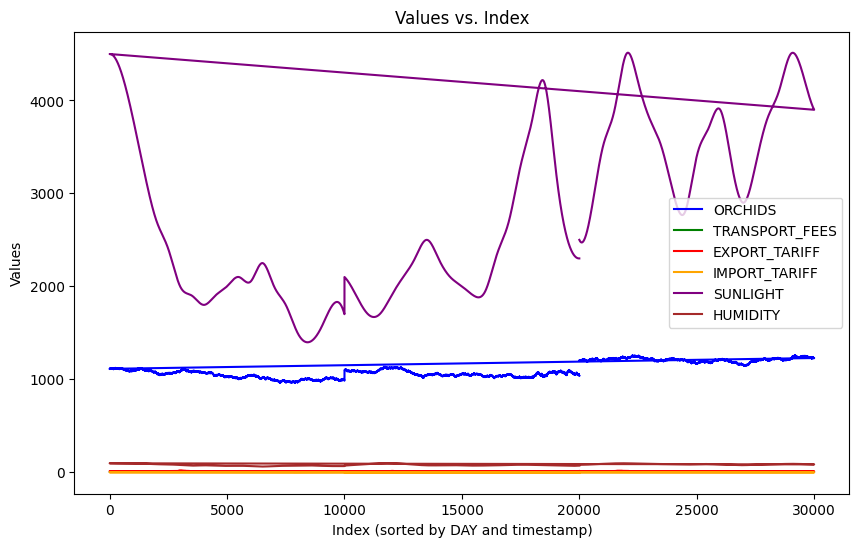

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()

# Navigate to the directory containing the CSV file
csv_directory = os.path.join(current_directory, "round-2-island-data-bottle")

# List files in the directory
files = os.listdir(csv_directory)

# Filter CSV files
csv_files = [file for file in files if file.endswith(".csv")]

if len(csv_files) == 0:
    print("No CSV files found in the directory.")
else:
    # Create an empty list to store DataFrames
    dfs = []
    i = 0
    # Iterate over each CSV file and load it into a DataFrame
    for csv_file in csv_files:
        i = i + 1
        print(i)
        csv_file_path = os.path.join(csv_directory, csv_file)
        df = pd.read_csv(csv_file_path, sep=";")
        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    final_df = pd.concat(dfs, ignore_index=True)
    
    sorted_df = final_df.sort_values(by=["DAY", "timestamp"])


    # Display the final DataFrame
    display(sorted_df)
    
    plt.figure(figsize=(10, 6))

# Plot ORCHIDS
plt.plot(sorted_df.index, sorted_df["ORCHIDS"], color='blue', label='ORCHIDS')
# Plot TRANSPORT_FEES
plt.plot(sorted_df.index, sorted_df["TRANSPORT_FEES"], color='green', label='TRANSPORT_FEES')
# Plot EXPORT_TARIFF
plt.plot(sorted_df.index, sorted_df["EXPORT_TARIFF"], color='red', label='EXPORT_TARIFF')
# Plot IMPORT_TARIFF
plt.plot(sorted_df.index, sorted_df["IMPORT_TARIFF"], color='orange', label='IMPORT_TARIFF')
# Plot SUNLIGHT
plt.plot(sorted_df.index, sorted_df["SUNLIGHT"], color='purple', label='SUNLIGHT')
# Plot HUMIDITY
plt.plot(sorted_df.index, sorted_df["HUMIDITY"], color='brown', label='HUMIDITY')

# Add labels and title
plt.xlabel('Index (sorted by DAY and timestamp)')
plt.ylabel('Values')
plt.title('Values vs. Index')
plt.legend()

# Show plot
plt.show()

In [11]:
def calculate_thresholds(df, multiplication_factor):
    # Calculate mean for each parameter
    mean_values = df.mean()
    
    # Calculate standard deviation for each parameter
    std_dev_values = df.std()
    
    # Calculate positive thresholds
    positive_thresholds = mean_values + multiplication_factor * std_dev_values
    
    # Calculate negative thresholds
    negative_thresholds = std_dev_values * 1.5
    
    # Return thresholds
    return negative_thresholds

multiplication_factor = 2  # You can adjust this factor as needed
negative_thresholds = calculate_thresholds(sorted_df[['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']], multiplication_factor)

print("\nSTD:")
print(negative_thresholds)


STD:
ORCHIDS            122.962833
TRANSPORT_FEES       0.431281
EXPORT_TARIFF        2.052873
IMPORT_TARIFF        1.853289
SUNLIGHT          1368.549886
HUMIDITY            14.049085
dtype: float64


In [12]:
corr_matrix = sorted_df.corr()
corr_matrix

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,1.000000e+00,-0.233472,-0.025516,-0.055170,-0.064258,-0.002905,-0.534867,-6.141551e-16
ORCHIDS,-2.334717e-01,1.000000,0.300625,0.222046,0.364607,0.715692,0.710066,-7.371087e-01
TRANSPORT_FEES,-2.551587e-02,0.300625,1.000000,0.273924,0.694204,0.172277,0.162856,-6.730436e-01
EXPORT_TARIFF,-5.517001e-02,0.222046,0.273924,1.000000,0.281857,0.079873,0.111354,-2.741748e-01
IMPORT_TARIFF,-6.425823e-02,0.364607,0.694204,0.281857,1.000000,0.329229,0.121175,-8.142540e-01
SUNLIGHT,-2.904790e-03,0.715692,0.172277,0.079873,0.329229,1.000000,0.622936,-5.315089e-01
HUMIDITY,-5.348669e-01,0.710066,0.162856,0.111354,0.121175,0.622936,1.000000,-3.512669e-01
DAY,-6.141551e-16,-0.737109,-0.673044,-0.274175,-0.814254,-0.531509,-0.351267,1.000000e+00


<Axes: >

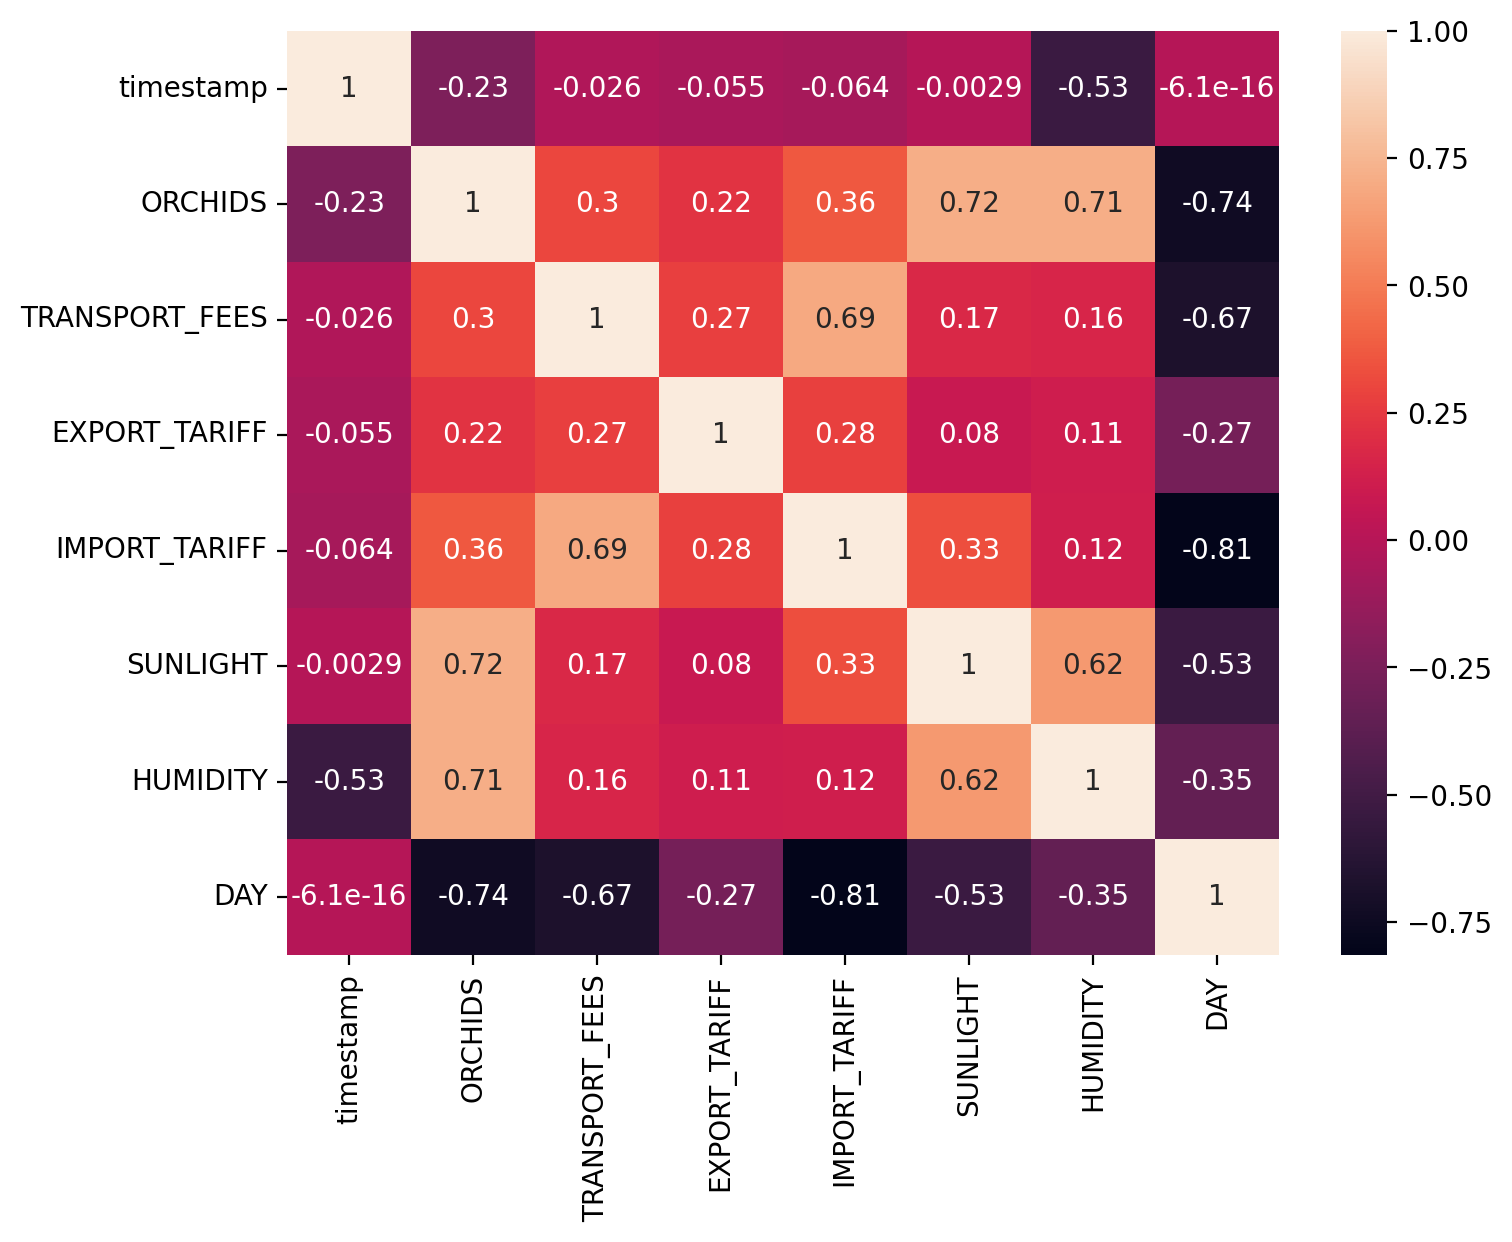

In [14]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

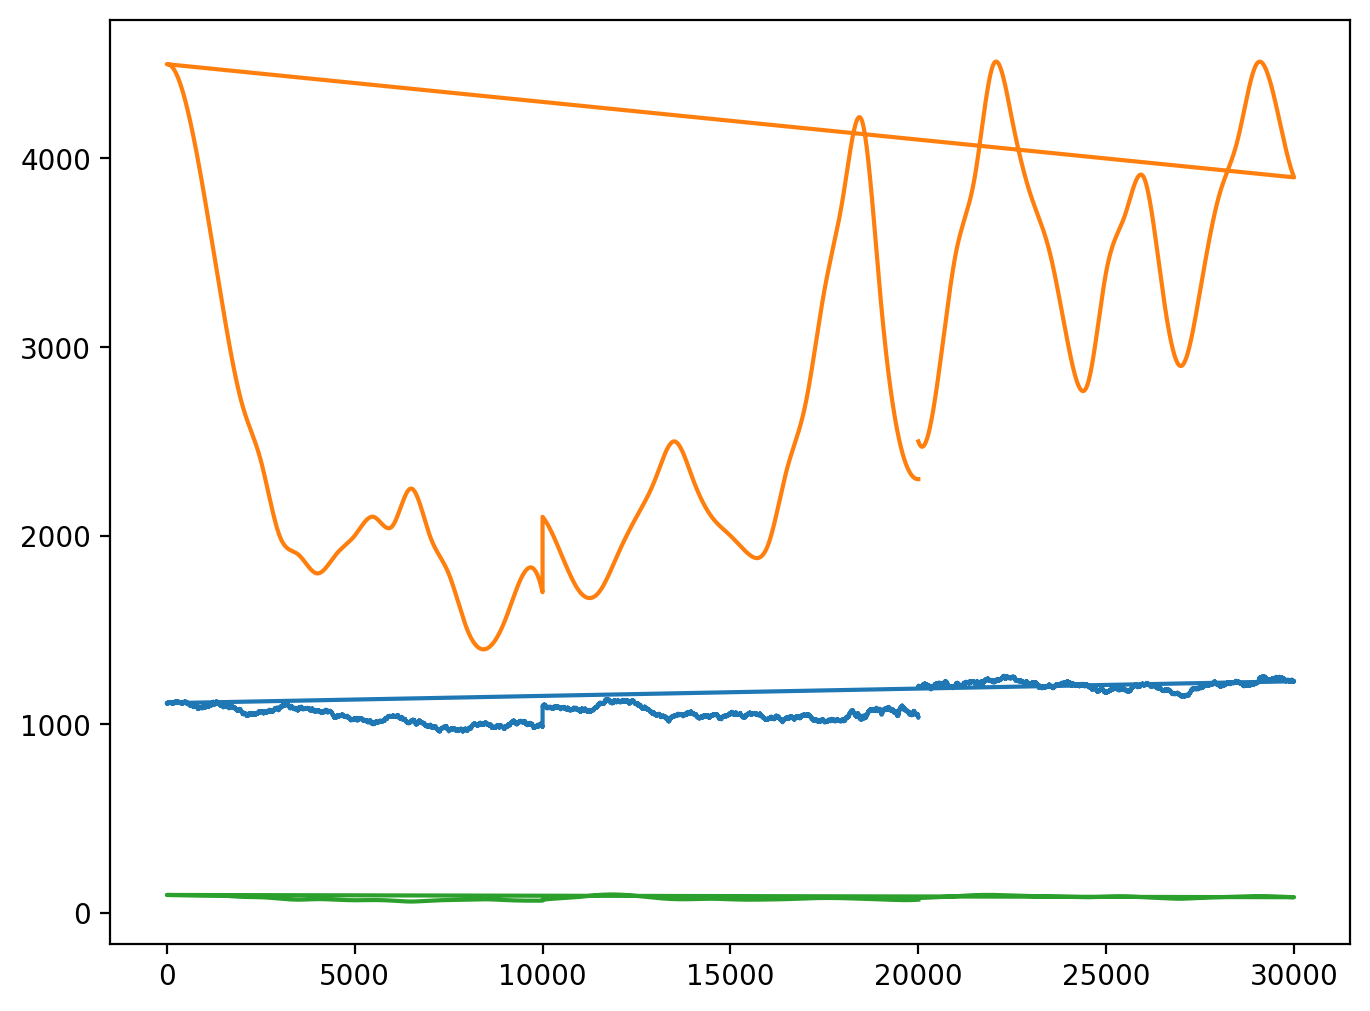

In [16]:
figure(figsize=(8, 6), dpi=200)
ORCHIDS = sorted_df['ORCHIDS']
SUNLIGHT = sorted_df['SUNLIGHT']
HUMIDITY = sorted_df['HUMIDITY']
plt.plot(ORCHIDS, label = "ORCHIDS")
plt.plot(SUNLIGHT, label = "SUNLIGHT")
plt.plot(HUMIDITY, label = "HUMIDITY")

In [21]:
import statsmodels.tsa.stattools as ts 
result = ts.coint(ORCHIDS, SUNLIGHT)
result2 = ts.coint(ORCHIDS, HUMIDITY)

In [26]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
cointegration_t_statistic2 = result2[0]
p_val2 = result2[1]
critical_values_test_statistic_at_1_5_102 = result2[2]

In [27]:
from statsmodels.tsa.stattools import adfuller
BRK_B_ADF = adfuller(ORCHIDS)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(SUNLIGHT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
MSFT_ADF2 = adfuller(HUMIDITY)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF2[1])
Spread_ADF = adfuller(ORCHIDS - SUNLIGHT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Spread_ADF2 = adfuller(ORCHIDS - HUMIDITY)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF2[1])
Ratio_ADF = adfuller(ORCHIDS / SUNLIGHT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
Ratio_ADF2 = adfuller(ORCHIDS / HUMIDITY)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF2[1])

P value for the Augmented Dickey-Fuller Test is 0.49159703786191783
P value for the Augmented Dickey-Fuller Test is 0.7545128939751887
P value for the Augmented Dickey-Fuller Test is 0.8012076335753936
P value for the Augmented Dickey-Fuller Test is 0.7219114873949117
P value for the Augmented Dickey-Fuller Test is 0.3943871554656761
P value for the Augmented Dickey-Fuller Test is 0.7073897930077774
P value for the Augmented Dickey-Fuller Test is 0.38868927258380565


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

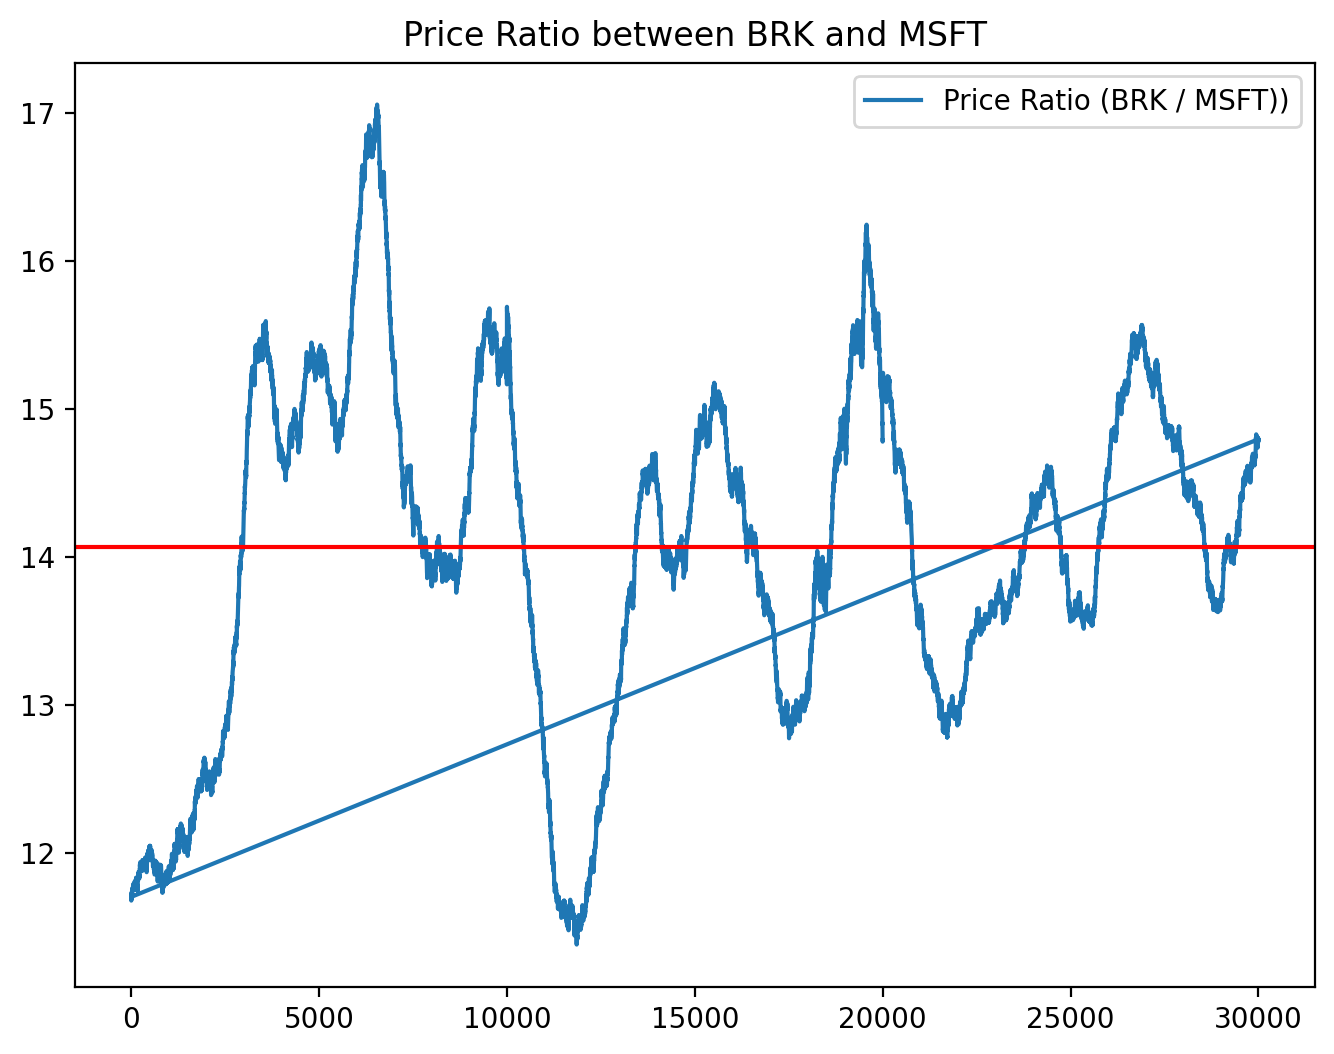

In [29]:
figure(figsize=(8, 6), dpi=200)
ratio = ORCHIDS / HUMIDITY
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

In [31]:
train = ratio[0:round(0.8*len(ratio))]
test = ratio[round(0.8*len(ratio)):]
print('Do the splits check out?',len(train) + len(test) == len(ratio))

Do the splits check out? True


In [1]:
msg = """
193 land
284 sun
16 too
136 huge
26 dont
286 such
130 noun
202 student
184 brown
135 complete
118 play
29 cook
72 yard
233 clock
275 would
265 plain
5 excite
132 fire
28 wish
213 cool
272 child
163 past
212 colony
222 oil
7 dog
115 back
100 money
214 kind
64 open
107 finger
19 touch
109 are
241 dad
104 am
208 modern
108 meant
44 ocean
228 pitch
194 suit
58 town
179 east
204 over
35 group
250 good
137 kind
257 down
71 band
203 especially
113 organ
2 of
218 fire
197 out
247 area
280 touch
299 happen
126 sat
105 electric
198 wrote
67 buy
120 lot
252 stop
13 corn
201 where
264 check
34 live
150 best
86 hold
292 cause
235 grand
30 present
138 indicate
92 counter
87 we
183 like
36 visit
79 state
263 morning
227 true
209 are
234 ball
254 history
219 seat
62 rain
53 less
84 glass
178 tone
48 song
156 fair
226 element
25 speed
77 produce
223 quotient
46 sand
232 begin
83 moment
66 offer
267 probable
3 all
140 necessary
281 post
38 cent
225 happen
278 speech
161 object
283 silver
216 third
166 crease
261 wait
168 triangle
239 idea
240 clothe
169 young
139 discuss
243 field
89 company
96 capital
255 compare
99 chart
122 possible
174 written
162 remember
144 mile
256 cold
259 lady
274 felt
95 against
123 skin
124 prepare
42 he
294 card
196 organ
145 object
253 our
287 major
20 discuss
153 system
111 hole
75 above
266 they
236 produce
224 straight
285 level
164 though
290 modern
65 dry
262 bought
90 milk
127 make
165 show
23 middle
170 center
97 blood
159 speak
12 prove
51 select
4 power
172 come
68 brown
167 experiment
230 strong
101 hurry
24 touch
296 reach
22 case
119 beat
182 over
185 dry
40 hill
69 company
8 opposite
143 work
268 field
188 felt
187 prepare
45 now
82 his
269 stay
279 toward
245 observe
289 time
149 stop
295 possible
171 card
14 prepare
190 current
57 compare
116 neighbor
88 thus
112 include
103 copy
47 bit
133 stead
134 does
80 general
258 solve
271 glad
158 duck
229 offer
176 happen
177 ball
291 bread
244 like
117 machine
238 come
59 any
129 band
63 it
94 section
60 close
273 heavy
43 produce
237 got
102 possible
251 insect
231 way
50 before
18 men
211 bird
146 ease
220 trade
151 winter
277 am
157 repeat
114 first
242 to
154 each
297 guide
152 column
206 single
260 remember
155 wild
282 major
125 coast
175 class
11 done
160 jump
217 sister
248 feel
15 check
76 fire
17 nine
181 indicate
276 parent
10 whole
121 her
192 the
128 temperature
1 design
56 big
6 skill
186 friend
33 hit
300 wait
191 instant
288 blow
85 about
32 chick
199 answer
210 man
81 material
249 current
246 think
98 print
141 nor
142 better
73 example
61 people
41 drink
27 gun
110 together
49 cost
180 require
293 or
91 people
39 planet
54 ease
215 ready
74 enough
37 sugar
21 deal
52 with
131 us
270 share
93 office
106 protect
200 low
221 thus
173 farm
9 oxygen
207 fire
70 force
195 select
147 paragraph
298 always
205 poem
31 chick
78 planet
189 fact
55 moment
148 term
"""


In [5]:
def decode(encoded_message):
    lines = encoded_message.strip().split('\n')
    pyramid = []
    for line in lines:
        num, word = line.split(' ')
        num = int(num)
        if len(pyramid) < num:
            pyramid.extend([[] for _ in range(num - len(pyramid))])
        pyramid[num - 1].append(word)

    return ' '.join(word for step in pyramid for word in step)


In [6]:
print(decode(msg))

design of all power excite skill dog opposite oxygen whole done prove corn prepare check too nine men touch discuss deal case middle touch speed dont gun wish cook present chick chick hit live group visit sugar cent planet hill drink he produce ocean now sand bit song cost before select with less ease moment big compare town any close people rain it open dry offer buy brown company force band yard example enough above fire produce planet state general material his moment glass about hold we thus company milk people counter office section against capital blood print chart money hurry possible copy am electric protect finger meant are together hole include organ first back neighbor machine play beat lot her possible skin prepare coast sat make temperature band noun us fire stead does complete huge kind indicate discuss necessary nor better work mile object ease paragraph term stop best winter column system each wild fair repeat duck speak jump object remember past though show crease expe